In [2]:
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix

In [3]:
#importing imdb data
imdb_sent = pd.read_csv('sentiment labelled sentences/imdb_labelled.txt', '\t', header=None)
imdb_sent.columns = ['text', 'sentiment']
imdb_sent.head()

,text,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [4]:
#identifying key words for bad reviews
keywords = ['worst', 'slow', 'boring', 'bored', 
            'bad', 'awful', 'terrible', 'negative', 'walked out', 
            'long', 'predictable', 'avoid', 'hard to watch', 'annoy', 'hate', 
            'stink', 'stunk', 'trash', 'unhappy', 'upset']

#creating columns to identify if keyword in review for test and train 
for key in keywords:
    imdb_sent[str(key)] = imdb_sent.text.str.contains(
        str(key), 
        case=False
    )

__Feature Engineering and Selection Process:__
In selecting these keywords as features in this model, I first brainstormed whatever words I could think of that could describe the latest bad movies I'd seen.  This yielded only a 50% correct labeling.  I then turned to google to identify more words that would describe bad movies.  I chose ones that I had seen in bad movie reviews in the past. 

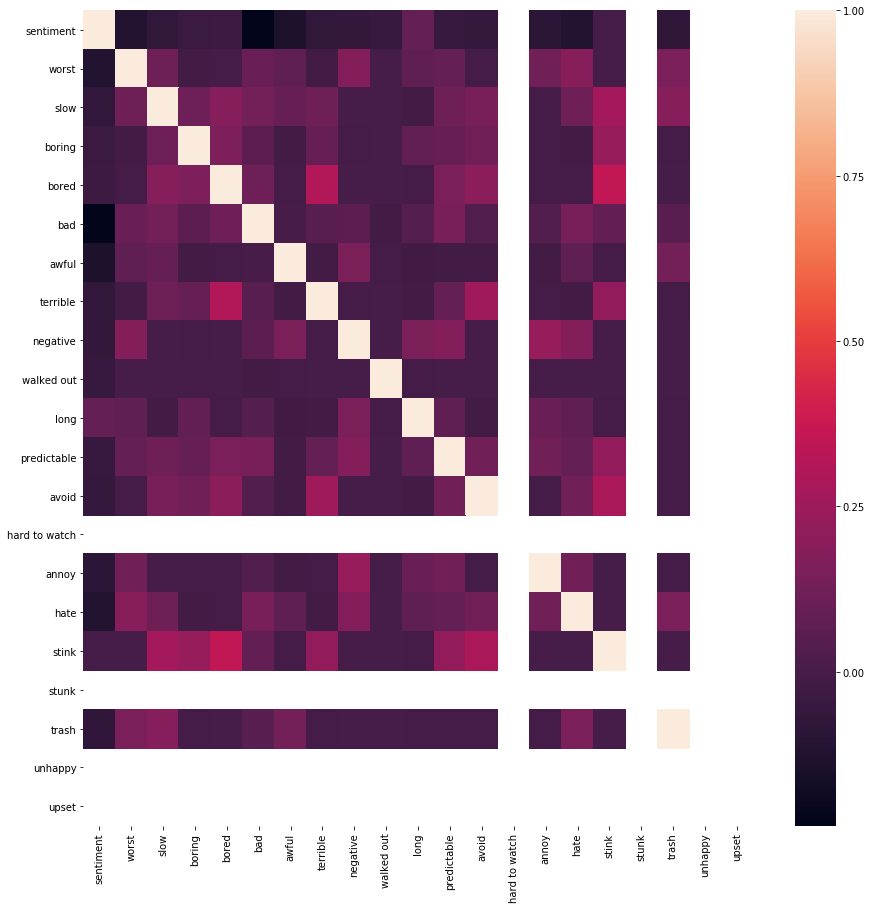

In [5]:
#plotting heatmap to ensure independence
plt.figure(figsize=(15, 15))
sns.heatmap(imdb_sent.corr())

In [6]:
#identifying initial percent positive and negative
sent_count = imdb_sent.sentiment.value_counts()
print('Total\nPercent Positive: {}\tPercent Negative: {}'.format(100*sent_count[0]/(imdb_sent.shape[0]), 100*sent_count[1]/(imdb_sent.shape[0]))) 

#splitting imdb data into train and test groups - 75%/25%
np.random.seed(222)
imdb_train = imdb_sent.sample(frac=0.75, replace=False)
imdb_test = imdb_sent.sample(frac=0.25, replace=False)

#identifying train and test percent positive and negative
sent_count_train = imdb_train.sentiment.value_counts()
print('Train\nPercent Positive: {}\tPercent Negative: {}'.format(100*sent_count_train[0]/(imdb_train.shape[0]), 100*sent_count_train[1]/(imdb_train.shape[0]))) 

sent_count_test = imdb_test.sentiment.value_counts()
print('Test\nPercent Positive: {}\tPercent Negative: {}'.format(100*sent_count_test[0]/(imdb_test.shape[0]), 100*sent_count_test[1]/(imdb_test.shape[0]))) 

Total
Percent Positive: 48.39572192513369	Percent Negative: 51.60427807486631
Train
Percent Positive: 47.05882352941177	Percent Negative: 52.94117647058823
Test
Percent Positive: 49.73262032085562	Percent Negative: 50.26737967914438


In [7]:
#identifying x and y values for train and test
data_train = imdb_train[keywords]
target_train = imdb_train['sentiment']

data_test = imdb_test[keywords]
target_test = imdb_test['sentiment']

#### Original Model

In [9]:
#initializing NB
bnb = BernoulliNB()
#training model 
bnb.fit(data_train, target_train)
#classifying test data
y_pred_test = bnb.predict(data_test)

print('Number of mislabeled points out of a total {} points: {}'.format(
     data_test.shape[0],
     (target_test != y_pred_test).sum()
))
#percent mislabeled
print('Accuracy: ', (100 * ((target_test == y_pred_test).sum()) /data_test.shape[0]), '%')
conf = confusion_matrix(target_test, y_pred_test)
print(conf)
print('Sensitivity: ', 100*conf[1,1] / (conf[1,1] + conf[1,0]), '%')
print('Spesificity: ', 100*conf[0,0] / (conf[0,0] + conf[0,1]), '%')

Number of mislabeled points out of a total 187 points: 65
Accuracy:  65.24064171122994 %
[[28 65]
 [ 0 94]]
Sensitivity:  100.0 %
Spesificity:  30.107526881720432 %


#### Iteration with half the number of features

In [11]:
imdb_sent = pd.read_csv('sentiment labelled sentences/imdb_labelled.txt', '\t', header=None)
imdb_sent.columns = ['text', 'sentiment']

#identifying key words for bad reviews
keywords = ['worst', 'slow', 'boring', 'bored', 
            'bad', 'awful', 'terrible', 'negative', 'walked out']

#creating columns to identify if keyword in review for test and train 
for key in keywords:
    imdb_sent[str(key)] = imdb_sent.text.str.contains(
        str(key), 
        case=False
    )

In [12]:
#splitting imdb data into train and test groups - 75%/25%
np.random.seed(222)
imdb_train = imdb_sent.sample(frac=0.75, replace=False)
imdb_test = imdb_sent.sample(frac=0.25, replace=False)

#identifying x and y values for train and test
data_train = imdb_train[keywords]
target_train = imdb_train['sentiment']

data_test = imdb_test[keywords]
target_test = imdb_test['sentiment']

In [13]:
#initializing NB
bnb = BernoulliNB()
#training model 
bnb.fit(data_train, target_train)
#classifying test data
y_pred_test = bnb.predict(data_test)

print('Number of mislabeled points out of a total {} points: {}'.format(
     data_test.shape[0],
     (target_test != y_pred_test).sum()
))
#percent mislabeled
print('Accuracy: ', (100 * ((target_test == y_pred_test).sum()) /data_test.shape[0]), '%')
conf = confusion_matrix(target_test, y_pred_test)
print(conf)
print('Sensitivity: ', 100*conf[1,1] / (conf[1,1] + conf[1,0]), '%')
print('Spesificity: ', 100*conf[0,0] / (conf[0,0] + conf[0,1]), '%')


Number of mislabeled points out of a total 187 points: 71
Accuracy:  62.032085561497325 %
[[22 71]
 [ 0 94]]
Sensitivity:  100.0 %
Spesificity:  23.655913978494624 %


In [132]:
imdb_sent = pd.read_csv('sentiment labelled sentences/imdb_labelled.txt', '\t', header=None)
imdb_sent.columns = ['text', 'sentiment']

#identifying key words for bad reviews
keywords = ['worst', 'slow', 'boring', 'bored', 
            'bad', 'awful', 'terrible', 'negative', 'walked out', 
            'long', 'predictable', 'avoid', 'hard to watch', 'annoy', 'hate', 
            'stink', 'stunk', 'trash', 'unhappy', 'upset']

#creating columns to identify if keyword in review for test and train 
for key in keywords:
    imdb_sent[str(key)] = imdb_sent.text.str.contains(
        str(key), 
        case=False
    )

#splitting imdb data into train and test groups - 75%/25%
np.random.seed(222)
imdb_train = imdb_sent.sample(frac=0.75, replace=False)
imdb_test = imdb_sent.sample(frac=0.25, replace=False)


#identifying x and y values for train and test
data_train = imdb_train[keywords]
target_train = imdb_train['sentiment']

data_test = imdb_test[keywords]
target_test = imdb_test['sentiment']


#### Modeling on single keywords

In [133]:
i = 0

for i in np.arange(len(keywords)):
    data = data_train.iloc[:, i:i+1]
    #initializing NB
    bnb = BernoulliNB()
    #training model 
    bnb.fit(data, target_train)
    #classifying test data
    y_pred_test = bnb.predict(data_test.iloc[:, i:i+1])

    #stats
    print('Feature {}: {}'.format(i, keywords[i]))
    print('Accuracy: ', (100 * ((target_test == y_pred_test).sum()) /data_test.shape[0]), '%')
    conf = confusion_matrix(target_test, y_pred_test)
    print(conf)
    print('Sensitivity: ', 100*conf[1,1] / (conf[1,1] + conf[1,0]), '%')
    print('Spesificity: ', 100*conf[0,0] / (conf[0,0] + conf[0,1]), '%')
    print()
    i += 1

Feature 0: worst
Accuracy:  52.94117647058823 %
[[ 5 88]
 [ 0 94]]
Sensitivity:  100.0 %
Spesificity:  5.376344086021505 %

Feature 1: slow
Accuracy:  50.80213903743316 %
[[ 1 92]
 [ 0 94]]
Sensitivity:  100.0 %
Spesificity:  1.075268817204301 %

Feature 2: boring
Accuracy:  50.26737967914438 %
[[ 0 93]
 [ 0 94]]
Sensitivity:  100.0 %
Spesificity:  0.0 %

Feature 3: bored
Accuracy:  50.80213903743316 %
[[ 1 92]
 [ 0 94]]
Sensitivity:  100.0 %
Spesificity:  1.075268817204301 %

Feature 4: bad
Accuracy:  55.61497326203209 %
[[10 83]
 [ 0 94]]
Sensitivity:  100.0 %
Spesificity:  10.75268817204301 %

Feature 5: awful
Accuracy:  53.475935828877006 %
[[ 6 87]
 [ 0 94]]
Sensitivity:  100.0 %
Spesificity:  6.451612903225806 %

Feature 6: terrible
Accuracy:  50.80213903743316 %
[[ 1 92]
 [ 0 94]]
Sensitivity:  100.0 %
Spesificity:  1.075268817204301 %

Feature 7: negative
Accuracy:  51.336898395721924 %
[[ 2 91]
 [ 0 94]]
Sensitivity:  100.0 %
Spesificity:  2.150537634408602 %

Feature 8: walke

In [135]:
i = 1
kw = keywords[0:1] + keywords[4:6] + keywords[10:12]

data_train = imdb_train[kw]
target_train = imdb_train['sentiment']

data_test = imdb_test[kw]
target_test = imdb_test['sentiment']
    
#initializing NB
bnb = BernoulliNB()
#training model 
bnb.fit(data_train, target_train)
#classifying test data
y_pred_test = bnb.predict(data_test)

#percent mislabeled
print('Features: ', kw)
print('Accuracy: ', (100 * ((target_test == y_pred_test).sum()) /data_test.shape[0]), '%')
conf = confusion_matrix(target_test, y_pred_test)
print(conf)
print('Sensitivity: ', 100*conf[1,1] / (conf[1,1] + conf[1,0]), '%')
print('Spesificity: ', 100*conf[0,0] / (conf[0,0] + conf[0,1]), '%')
i += 1

Features:  ['worst', 'bad', 'awful', 'predictable', 'avoid']
Accuracy:  63.101604278074866 %
[[24 69]
 [ 0 94]]
Sensitivity:  100.0 %
Spesificity:  25.806451612903224 %


#### Analysis of Classifiers

My original classifier overfit the data because I had too many keyword features.  Using single features helped to identify individual features that had the biggest impact on accuracy and spesificity.  Putting together all of the best keywords resulted in a relatively high accuracy and good specificity without overfitting.